In [99]:
using DifferentialEquations
using Plots
using LinearAlgebra
using LaTeXStrings
using GR
using Pkg

In [100]:
Pkg.update("GR"); ENV["GRDIR"]=""; Pkg.build("GR")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
  Building GR → `~/.julia/packages/GR/tPkHV/deps/build.log`


false

In [65]:
s = 0.3
F_matrix = [0 1; -1 0]

function gd_discrete(ini_solution, num_iter, s=0.3)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = copy(current_solution)
    next_solution -= s*F_matrix*current_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function pgd_discrete(ini_solution, num_iter, s=0.3)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = (I+s*F_matrix) \ current_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function egd_discrete(ini_solution, num_iter, s=0.3)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    middle_solution = copy(current_solution)
    middle_solution -= s*F_matrix*current_solution
    next_solution = copy(current_solution)
    next_solution -= s*F_matrix*middle_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function new_discrete(ini_solution, num_iter, s=0.3)
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    current_solution += s*F_matrix*F_matrix*current_solution
  end
  return solutions
end

function gd!(dx, x, p, t, s=0.3)
#   s = 0.3
  matrix = [s/2 -1; 1 s/2]
#     [1 -s/2; s/2 1]
#   matrix_inverse = inv(matrix)
  dx[1] = matrix[1,1] * x[1] + matrix[1,2] * x[2]
  dx[2] = matrix[2,1] * x[1] + matrix[2,2] * x[2]
end

function pgd!(dx, x, p, t; s=0.3)
  matrix = [-s/2 -1; 1 -s/2]
#   s = 0.3
#   matrix = [1 s/2; -s/2 1]
#   matrix_inverse = inv(matrix)
  dx[1] = matrix[1,1] * x[1] + matrix[1,2] * x[2]
  dx[2] = matrix[2,1] * x[1] + matrix[2,2] * x[2]
end

function high_pgd!(dx, x, p, t; s=0.3)
  matrix = [-s/2 -1+2*s^2/3; 1-2*s^2/3 -s/2]
#   s = 0.3
#   matrix = [1 s/2; -s/2 1]
#   matrix_inverse = inv(matrix)
  dx[1] = matrix[1,1] * x[1] + matrix[1,2] * x[2]
  dx[2] = matrix[2,1] * x[1] + matrix[2,2] * x[2]
end

function high_egm!(dx, x, p, t; s=0.3)
  matrix = [-s/2 -1-s^2/3; 1+s^2/3 -s/2]
#   s = 0.3
#   matrix = [1 s/2; -s/2 1]
#   matrix_inverse = inv(matrix)
  dx[1] = matrix[1,1] * x[1] + matrix[1,2] * x[2]
  dx[2] = matrix[2,1] * x[1] + matrix[2,2] * x[2]
end

function gf!(dx, x, p, t, s=0.3)
#   s = 0.3
  dx[1] = - x[2]
  dx[2] = x[1]
end

function pdhg_discrete(ini_solution, num_iter, s=0.3)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = copy(current_solution)
    next_solution[1] -= s*next_solution[2]
    next_solution[2] += s*(2*next_solution[1]-current_solution[1])
    current_solution = copy(next_solution)
  end
  return solutions
end

pdhg_discrete (generic function with 2 methods)

In [44]:
x0 = [1.0;1.0]
tspan = (0.0,8.0)

(0.0, 8.0)

In [46]:
xylim=4.5
solutions_gd = gd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_pgd = pgd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_egd = egd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_new = new_discrete(x0, Int(ceil(tspan[2]/s)))
ODE_gf = ODEProblem(gf!,x0,tspan)
sol_gf = solve(ODE_gf);
plot(solutions_gd[1,:], solutions_gd[2,:], color=:blue, linewidth=2, label="GM", arrow=0.5, dpi=300)
plot!(solutions_pgd[1,:], solutions_pgd[2,:], color=:red, linewidth=2, label="PPM", arrow=0.5)
plot!(solutions_egd[1,:], solutions_egd[2,:], color=:green, linewidth=2, label="EGM", arrow=0.5)
plot!(solutions_new[1,:], solutions_new[2,:], color=:orange, linewidth=2, label="JM", arrow=0.5)
plot!(sol_gf, vars=(1,2), color=:black, linewidth=2, label="GF", arrow=0.5, aspect_ratio=:equal)
xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
savefig("GM_PPM_EGM")

In [102]:
solutions_gd = gd_discrete(x0, Int(ceil(tspan[2]/s)))
ODE_gd = ODEProblem(gd!,x0,tspan)
sol_gd = solve(ODE_gd);
xylim=1.5
solutions_pgd = pgd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_egd = egd_discrete(x0, Int(ceil(tspan[2]/s)))
ODE_pgd = ODEProblem(pgd!,x0,tspan)
sol_pgd = solve(ODE_pgd);
ODE_high_pgd = ODEProblem(high_pgd!,x0,tspan)
sol_high_pgd = solve(ODE_high_pgd);
ODE_high_egm = ODEProblem(high_egm!,x0,tspan)
sol_high_egm = solve(ODE_high_egm);
plot(solutions_pgd[1,:], solutions_pgd[2,:], color=:red, linewidth=2, label="PPM", arrow=0.5, aspect_ratio=:equal, dpi=300)
plot!(sol_pgd, vars=(1,2), color=:black, linewidth=2, label=L"a\$s^2\$textrm{a}bc", arrow=0.5)
plot!(sol_high_pgd, vars=(1,2), color=:blue, linewidth=2, label=L"O(s^2)$-ODE", arrow=0.5)
plot!(sol_high_egm, vars=(1,2), color=:grey, linewidth=2, label="ODE", arrow=0.5)
plot!(solutions_egd[1,:], solutions_egd[2,:], color=:green, linewidth=2, label="EGM", arrow=0.5)
# plot!(solutions_gd[1,:], solutions_gd[2,:], color=:blue, linewidth=2, label="GM", arrow=0.5)
# plot!(sol_gd, vars=(1,2), color=:grey, linewidth=2, label="ODE_GM", arrow=0.5, aspect_ratio=:equal)
xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
savefig("PPM_EGM_ODE_03")

sh: latex: command not found
latex: failed to create a dvi file
sh: latex: command not found
latex: failed to create a dvi file


In [90]:
solutions_gd = gd_discrete(x0, Int(ceil(tspan[2]/s)))
ODE_gd = ODEProblem(gd!,x0,tspan)
sol_gd = solve(ODE_gd);
xylim=4.5
plot(solutions_gd[1,:], solutions_gd[2,:], color=:blue, linewidth=2, label="GM", arrow=0.5, dpi=300)
plot!(sol_gd, vars=(1,2), color=:grey, linewidth=2, label="ODE", arrow=0.5, aspect_ratio=:equal)
xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
savefig("GD_ODE_03")

In [7]:
# solutions_pgd = pgd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_gd = gd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_egd = egd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_pdhg = pdhg_discrete(x0, Int(ceil(tspan[2]/s)))
# ODE_pgd = ODEProblem(pgd!,x0,tspan)
# sol_pgd = solve(ODE_pgd);
xylim=3

plot(solutions_egd[1,:], solutions_egd[2,:], color=:red, linewidth=2, label="MP", arrow=0.5,legend=:bottomright, aspect_ratio=:equal)
plot!(solutions_gd[1,:], solutions_gd[2,:], color=:green, linewidth=2, label="GM", arrow=0.5,legend=:bottomright, aspect_ratio=:equal)
plot!(solutions_pdhg[1,:], solutions_pdhg[2,:], color=:blue, linewidth=2, label="PDHG", arrow=0.5,legend=:bottomright, aspect_ratio=:equal)

xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
savefig("MP_GM_PDHG")

In [8]:
solutions_pgd = pgd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_egd = egd_discrete(x0, Int(ceil(tspan[2]/s)))
ODE_pgd = ODEProblem(pgd!,x0,tspan)
sol_pgd = solve(ODE_pgd);
xylim=1.5
plot(solutions_pgd[1,:], solutions_pgd[2,:], color=:red, linewidth=2, label="PPM", arrow=0.5, dpi=300)
plot!(sol_pgd, vars=(1,2), color=:black, linewidth=2, label="ODE", arrow=0.5)
plot!(solutions_egd[1,:], solutions_egd[2,:], color=:green, linewidth=2, label="EGM", arrow=0.5, aspect_ratio=:equal)
xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
savefig("PPM_EGM_ODE_03")

In [9]:
ODE_pgd_1 = ODEProblem(pgd!(;s=0.1),x0,tspan)
sol_pgd = solve(ODE_pgd_1);
xylim=1.5
plot(solutions_pgd[1,:], solutions_pgd[2,:], color=:red, linewidth=2, label="PPM", arrow=0.5)
plot!(sol_pgd, vars=(1,2), color=:black, linewidth=2, label="ODE", arrow=0.5)
plot!(solutions_egd[1,:], solutions_egd[2,:], color=:green, linewidth=2, label="EGM", arrow=0.5, aspect_ratio=:equal)
xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
# savefig("PPM_EGM_ODE_03", dpi=300)

MethodError: MethodError: no method matching pgd!(; s=0.1)
Closest candidates are:
  pgd!(!Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any; s) at In[2]:54

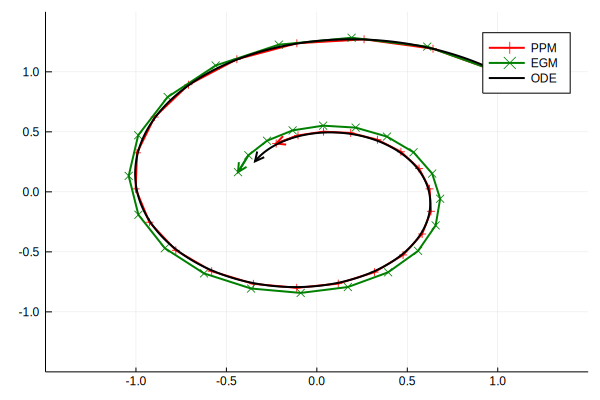

In [10]:
xylim=1.5
plot(solutions_pgd[1,:], solutions_pgd[2,:], color=:red, linewidth=2, label="PPM", arrow=0.5, markershape=:+, markeralpha=1, markerstrokecolor=:red)
plot!(solutions_egd[1,:], solutions_egd[2,:], color=:green, linewidth=2, label="EGM", arrow=0.5, markershape=:x, markeralpha=1, markerstrokecolor=:green)
plot!(sol_pgd, vars=(1,2), color=:black, linewidth=2, label="ODE", arrow=0.5)
xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
# savefig("PPM_EGM_ODE_01")

In [11]:
prob_gd = ODEProblem(gd!,x0,tspan)
sol_gd = solve(prob_gd)

# prob_pgd = ODEProblem(pgd!,x0,tspan)
# sol_pgd = solve(prob_pgd)

plot!(sol_gd, vars=(1,2), color=:red)
# plot(sol_pgd, vars=(1,2), color=:blue)
# savefig("gd.png")

# Results for Strongly Convex-Concave

In [50]:
s = 0.1
F_matrix = [1 2; -2 1]

function gd_discrete(ini_solution, num_iter, s=0.1)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = copy(current_solution)
    next_solution -= s*F_matrix*current_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function new_discrete(ini_solution, num_iter, s=0.1)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = copy(current_solution)
    next_solution += s*F_matrix*F_matrix*current_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function pgd_discrete(ini_solution, num_iter, s=0.1)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = (I+s*F_matrix) \ current_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function egd_discrete(ini_solution, num_iter, s=0.1)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    middle_solution = copy(current_solution)
    middle_solution -= s*F_matrix*current_solution
    next_solution = copy(current_solution)
    next_solution -= s*F_matrix*middle_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function gd!(dx, x, p, t, s=0.3)
#   s = 0.3
  matrix = [1-s/2 -s/2; s/2 1-s/2]
  matrix_inverse = inv(matrix)
  dx[1] = - matrix_inverse[1,1] * x[2] + matrix_inverse[1,2] * x[1]
  dx[2] = - matrix_inverse[2,1] * x[2] + matrix_inverse[2,2] * x[1]
end

function pgd!(dx, x, p, t; s=0.3)
#   s = 0.3
  matrix = [1+s/2 s/2; -s/2 1+s/2]
  matrix_inverse = inv(matrix)
  dx[1] = - matrix_inverse[1,1] * x[2] + matrix_inverse[1,2] * x[1]
  dx[2] = - matrix_inverse[2,1] * x[2] + matrix_inverse[2,2] * x[1]
end

function gf!(dx, x, p, t, s=0.3)
#   s = 0.3
  dx[1] = - x[1] - x[2]
  dx[2] = x[1] - x[2]
end

gf! (generic function with 2 methods)

In [52]:
xylim=1.5
solutions_gd = gd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_pgd = pgd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_egd = egd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_new = new_discrete(x0, Int(ceil(tspan[2]/s)))
ODE_gf = ODEProblem(gf!,x0,tspan)
sol_gf = solve(ODE_gf);
plot(solutions_gd[1,:], solutions_gd[2,:], color=:blue, linewidth=2, label="GM", arrow=0.5, legend=:bottomright, dpi=300)
plot!(solutions_pgd[1,:], solutions_pgd[2,:], color=:red, linewidth=2, label="PPM", arrow=0.5)
plot!(solutions_egd[1,:], solutions_egd[2,:], color=:green, linewidth=2, label="EGM", arrow=0.5)
plot!(solutions_new[1,:], solutions_new[2,:], color=:orange, linewidth=2, label="JM", arrow=0.5)
plot!(sol_gf, vars=(1,2), color=:black, linewidth=2, label="GF", arrow=0.5, aspect_ratio=:equal)
xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
savefig("GM_PPM_EGM_SCC")
# , dpi=300

In [14]:
if !(3>2 && 4>3)
    print(3)
else
    print(4)
end

4